<a href="https://colab.research.google.com/github/MuaddibMystic/Bioinformatics-Final-Project/blob/main/influenza_pipeline_finalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Install Dependencies

Install rpy2 (Enables R in Colab)

In [ ]:
!pip install rpy2==3.5.11
%load_ext rpy2.ipython


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for rpy2: filename=rpy2-3.5.11-cp312-cp312-linux_x86_64.whl size=329394 sha256=a9f2ebdb6309fceb933269d16e603ef80482d619a0293001a60e269adce75794
  Stored in directory: /root/.cache/pip/wheels/ba/57/02/525c617e5b7a31cf1bb1f04245a1e53a66b3a15ab073637e15
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.17
    Uninstalling rpy2-3.5.17:
      Successfully uninstalled rpy2-3.5.17


Install SRA Toolkit

In [ ]:
# Install SRA Toolkit
!wget https://ftp-trace.ncbi.nlm.nih.gov/sra/sdk/3.2.1/sratoolkit.3.2.1-ubuntu64.tar.gz
!tar -xzf sratoolkit.3.2.1-ubuntu64.tar.gz
!mv sratoolkit.3.2.1-ubuntu64 sratoolkit

import os
os.environ['PATH'] += ":/content/sratoolkit/bin"


--2025-12-06 01:40:03--  https://ftp-trace.ncbi.nlm.nih.gov/sra/sdk/3.2.1/sratoolkit.3.2.1-ubuntu64.tar.gz
Resolving ftp-trace.ncbi.nlm.nih.gov (ftp-trace.ncbi.nlm.nih.gov)... 130.14.250.31, 130.14.250.7, 130.14.250.10, ...
Connecting to ftp-trace.ncbi.nlm.nih.gov (ftp-trace.ncbi.nlm.nih.gov)|130.14.250.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92284274 (88M) [application/x-gzip]
Saving to: ‘sratoolkit.3.2.1-ubuntu64.tar.gz’

sratoolkit.3.2.1-ub 100%[===================>]  88.01M  62.1MB/s    in 1.4s    

2025-12-06 01:40:05 (62.1 MB/s) - ‘sratoolkit.3.2.1-ubuntu64.tar.gz’ saved [92284274/92284274]



Install Salmon

In [ ]:
# Install Salmon
!wget https://github.com/COMBINE-lab/salmon/releases/download/v1.9.0/salmon-1.9.0_linux_x86_64.tar.gz
!tar -xzf salmon-1.9.0_linux_x86_64.tar.gz
!mv salmon-1.9.0_linux_x86_64 salmon

import os
os.environ['PATH'] += ":/content/salmon/bin"


--2025-12-06 01:40:11--  https://github.com/COMBINE-lab/salmon/releases/download/v1.9.0/salmon-1.9.0_linux_x86_64.tar.gz
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/32549942/3bc9e9b8-c773-451d-8dbe-fbb7726a71c5?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-12-06T02%3A25%3A04Z&rscd=attachment%3B+filename%3Dsalmon-1.9.0_linux_x86_64.tar.gz&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-12-06T01%3A24%3A56Z&ske=2025-12-06T02%3A25%3A04Z&sks=b&skv=2018-11-09&sig=O3CPKshmRfMfseg0nEaTsKNTDkgTEgeLboBTvGacElU%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2NDk4NzAxMSwibmJmIjoxNzY0OTg1MjExLCJwYXRoIjoicm

# Section 2: Download Data

FASTQs

In [ ]:
# FASTQs
!bash -c 'for id in SRR12485106 SRR12485107 SRR12485108 SRR12485109 SRR12485110 SRR12485111 SRR12485112 SRR12485113; do fastq-dump --split-files $id; done'


Rejected 6156111 READS because READLEN < 1
Read 6156111 spots for SRR12485106
Written 6156111 spots for SRR12485106
Rejected 4795564 READS because READLEN < 1
Read 4795564 spots for SRR12485107
Written 4795564 spots for SRR12485107
Rejected 4738547 READS because READLEN < 1
Read 4738547 spots for SRR12485108
Written 4738547 spots for SRR12485108
Rejected 4867237 READS because READLEN < 1
Read 4867237 spots for SRR12485109
Written 4867237 spots for SRR12485109
Rejected 4787345 READS because READLEN < 1
Read 4787345 spots for SRR12485110
Written 4787345 spots for SRR12485110
Rejected 4726232 READS because READLEN < 1
Read 4726232 spots for SRR12485111
Written 4726232 spots for SRR12485111
Rejected 4864268 READS because READLEN < 1
Read 4864268 spots for SRR12485112
Written 4864268 spots for SRR12485112
Rejected 4512372 READS because READLEN < 1
Read 4512372 spots for SRR12485113
Written 4512372 spots for SRR12485113


Ensembl Reference

In [ ]:
# Ensembl reference
!wget https://ftp.ensembl.org/pub/release-110/fasta/homo_sapiens/cdna/Homo_sapiens.GRCh38.cdna.all.fa.gz
!gunzip Homo_sapiens.GRCh38.cdna.all.fa.gz
!salmon index -t Homo_sapiens.GRCh38.cdna.all.fa -i hs_index


--2025-12-06 01:57:27--  https://ftp.ensembl.org/pub/release-110/fasta/homo_sapiens/cdna/Homo_sapiens.GRCh38.cdna.all.fa.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.169
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78889691 (75M) [application/x-gzip]
Saving to: ‘Homo_sapiens.GRCh38.cdna.all.fa.gz’

Homo_sapiens.GRCh38 100%[===================>]  75.23M  31.7MB/s    in 2.4s    

2025-12-06 01:57:29 (31.7 MB/s) - ‘Homo_sapiens.GRCh38.cdna.all.fa.gz’ saved [78889691/78889691]

Version Info: ### PLEASE UPGRADE SALMON ###
### A newer version of salmon with important bug fixes and improvements is available. ####
###
The newest version, available at https://github.com/COMBINE-lab/salmon/releases
contains new features, improvements, and bug fixes; please upgrade at your
earliest convenience.
###
Sign up for the salmon mailing list to hear about new versions, features and updates at:
http

# Section 3: Quantifying

In [ ]:
!bash -c 'for s in SRR12485106 SRR12485107 SRR12485108 SRR12485109 SRR12485110 SRR12485111 SRR12485112 SRR12485113; do \
    mkdir -p ${s}_quant; \
    salmon quant -i hs_index -l A -r ${s}_1.fastq -p 4 -o ${s}_quant; \
done'


Version Info: ### PLEASE UPGRADE SALMON ###
### A newer version of salmon with important bug fixes and improvements is available. ####
###
The newest version, available at https://github.com/COMBINE-lab/salmon/releases
contains new features, improvements, and bug fixes; please upgrade at your
earliest convenience.
###
Sign up for the salmon mailing list to hear about new versions, features and updates at:
https://oceangenomics.com/subscribe
### salmon (selective-alignment-based) v1.9.0
### [ program ] => salmon 
### [ command ] => quant 
### [ index ] => { hs_index }
### [ libType ] => { A }
### [ unmatedReads ] => { SRR12485106_1.fastq }
### [ threads ] => { 4 }
### [ output ] => { SRR12485106_quant }
Logs will be written to SRR12485106_quant/logs
[2025-12-06 02:23:29.877] [jointLog] [info] setting maxHashResizeThreads to 4
[2025-12-06 02:23:29.877] [jointLog] [info] Fragment incompatibility prior below threshold.  Incompatible fragments will be ignored.
[2025-12-06 02:23:29.877] [joi

# Section 4: Import Data Into R

In [ ]:
%%R
if (!require("BiocManager")) install.packages("BiocManager", repos="https://cloud.r-project.org")
BiocManager::install(c("tximport", "DESeq2"), ask=FALSE)

library(tximport)
library(DESeq2)
library(ggplot2)

samples <- c(
  "SRR12485106","SRR12485107","SRR12485108","SRR12485109",
  "SRR12485110","SRR12485111","SRR12485112","SRR12485113"
)

files <- file.path(getwd(), paste0(samples, "_quant"), "quant.sf")
names(files) <- samples

coldata <- data.frame(
  row.names = samples,
  condition = factor(c(rep("mock", 4), rep("infected", 4)))
)

hdr <- readLines("Homo_sapiens.GRCh38.cdna.all.fa")
hdr <- hdr[grepl("^>", hdr)]
tx <- sub("^>([^ ]+).*", "\\1", hdr)
tx <- sub("\\..*$", "", tx)
gene <- sub(".*gene:([^ ]+).*", "\\1", hdr)
tx2gene <- data.frame(tx=tx, gene=gene, stringsAsFactors=FALSE)

txi <- tximport(files,
                type="salmon",
                tx2gene=tx2gene,
                ignoreTxVersion=TRUE,
                countsFromAbundance="lengthScaledTPM")

dds <- DESeqDataSetFromTximport(txi, colData=coldata, design = ~ condition)


'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com










# Section 5: PCA

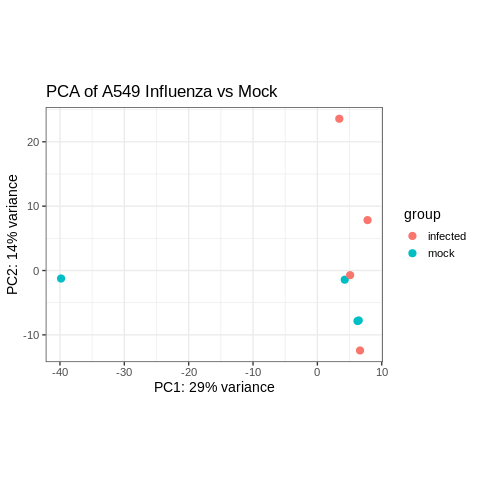

In [ ]:
%%R
library(DESeq2)
library(ggplot2)

# Variance stabilizing transform
vsd <- vst(dds, blind = TRUE)

# PCA plot
p <- plotPCA(vsd, intgroup = "condition") +
  ggtitle("PCA of A549 Influenza vs Mock") +
  theme_bw(base_size = 14)

# Save PCA
ggsave("PCA_plot.png", plot = p, width = 6, height = 5)

p


# Section 6: Differential Expression (DESeq2), MA Plot, Volcano Plot

# Section 6A: DESeq2

In [ ]:
%%R
dds <- DESeq(dds)

res <- results(dds, contrast = c("condition", "infected", "mock"))

summary(res)

res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), "DESeq2_results.csv")

head(res_ordered)




out of 35383 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 15, 0.042%
LFC < 0 (down)     : 28, 0.079%
outliers [1]       : 387, 1.1%
low counts [2]     : 28542, 81%
(mean count < 17)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

log2 fold change (MLE): condition infected vs mock 
Wald test p-value: condition infected vs mock 
DataFrame with 6 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat      pvalue
                   <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000107147.14  392.8173        6.42574  0.468645  13.71134 8.68386e-43
ENSG00000136928.7   128.0691       -4.93854  0.960164  -5.14343 2.69766e-07
ENSG00000292297.1    42.4778        4.23413  0.830069   5.10094 3.37966e-07
ENSG00000275594.4    88.3014       -1.90319  0.381055  -4.99453 5.89795e-07
ENSG00000143970.18   94.6868       -4.20815  0.925335  -4.54770 5.42351e-06
ENSG00000173588.16   43.5

# Section 6B: MA Plot

MA Plot

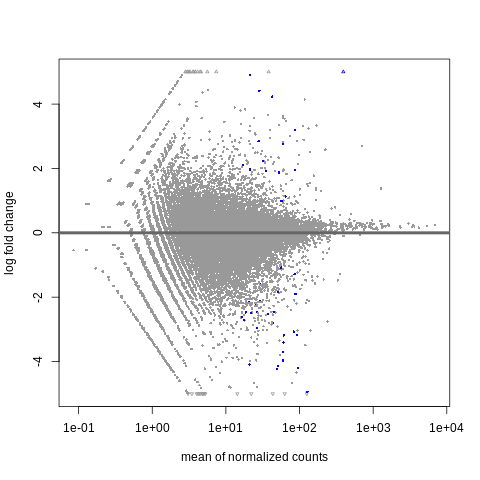

In [ ]:
%%R
plotMA(res, ylim=c(-5,5))


# Section 6C: Volcano Plot

Volcano Plot

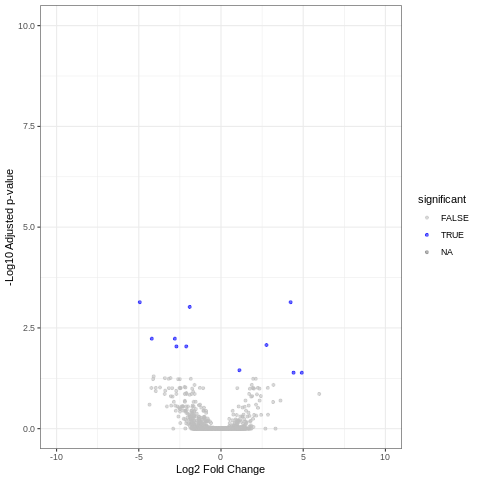

In [ ]:
%%R
library(ggplot2)

volcano_df <- as.data.frame(res)
volcano_df$gene <- rownames(volcano_df)
volcano_df$significant <- volcano_df$padj < 0.05

ggplot(volcano_df, aes(x = log2FoldChange, y = -log10(padj))) +
  geom_point(aes(color = significant), alpha = 0.6, size = 1.2) +
  scale_color_manual(values = c("grey", "blue")) +
  coord_cartesian(xlim = c(-10, 10), ylim = c(0, 10)) +
  theme_bw() +
  labs(x = "Log2 Fold Change",
       y = "-Log10 Adjusted p-value")


# Section 7: FGSEA Pathway

Section 7A: Build Ranked Gene List

In [ ]:
%%R
install.packages("BiocManager", repos="https://cloud.r-project.org")

BiocManager::install(
  c("fgsea", "org.Hs.eg.db", "AnnotationDbi"),
  ask = FALSE,
  update = FALSE
)

install.packages("msigdbr", repos="https://cloud.r-project.org")

library(fgsea)
library(msigdbr)
library(org.Hs.eg.db)
library(AnnotationDbi)


(as ‘lib’ is unspecified)







	‘/tmp/RtmpRL9xTE/downloaded_packages’

'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com
















	‘/tmp/RtmpRL9xTE/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpRL9xTE/downloaded_packages’





In [ ]:
%%R
head(rownames(res))


[1] "ENSG00000000003.16" "ENSG00000000005.6"  "ENSG00000000419.14"
[4] "ENSG00000000457.14" "ENSG00000000460.17" "ENSG00000000938.13"


In [ ]:
%%R
library(fgsea)
library(msigdbr)
library(org.Hs.eg.db)
library(AnnotationDbi)
library(dplyr)

clean_ids <- sub("\\..*$", "", rownames(res))

symbol_map <- AnnotationDbi::select(
  org.Hs.eg.db,
  keys = clean_ids,
  keytype = "ENSEMBL",
  columns = "SYMBOL"
)

symbol_map <- symbol_map[!is.na(symbol_map$SYMBOL), ]
symbol_map <- symbol_map[!duplicated(symbol_map$ENSEMBL), ]

res_df <- as.data.frame(res)
res_df$ENSEMBL <- clean_ids

res_merged <- merge(res_df, symbol_map, by="ENSEMBL", all.x=TRUE)
res_merged <- res_merged[!is.na(res_merged$SYMBOL), ]
res_merged <- res_merged[!duplicated(res_merged$SYMBOL), ]

rank_metric <- res_merged$stat
names(rank_metric) <- res_merged$SYMBOL
rank_metric <- sort(rank_metric, decreasing = TRUE)

m_df <- msigdbr(species="Homo sapiens", collection="H")
pathways <- split(m_df$gene_symbol, m_df$gs_name)

set.seed(42)
fgsea_res <- fgseaMultilevel(
  pathways = pathways,
  stats = rank_metric
)

fgsea_res <- fgsea_res[order(fgsea_res$padj), ]
head(fgsea_res)


                            pathway         pval         padj   log2err
                             <char>        <num>        <num>     <num>
1: HALLMARK_TNFA_SIGNALING_VIA_NFKB 4.811964e-12 2.405982e-10 0.8870750
2:          HALLMARK_MYC_TARGETS_V1 1.884489e-11 4.711223e-10 0.8634154
3:        HALLMARK_MTORC1_SIGNALING 1.333207e-07 2.222012e-06 0.6901325
4:             HALLMARK_P53_PATHWAY 4.037298e-07 5.046622e-06 0.6749629
5:              HALLMARK_DNA_REPAIR 1.242079e-06 1.054396e-05 0.6435518
6:          HALLMARK_UV_RESPONSE_UP 1.265275e-06 1.054396e-05 0.6435518
           ES       NES  size  leadingEdge
        <num>     <num> <int>       <list>
1: -0.5096459 -2.176156   199 KDM6B, Z....
2: -0.5028185 -2.147003   199 PCBP1, R....
3: -0.4445338 -1.898616   200 ELOVL6, ....
4: -0.4382075 -1.871118   199 BTG1, RA....
5: -0.4688450 -1.932822   148 PDE4B, G....
6: -0.4513561 -1.867246   156 ABCB1, P....


In [ ]:
%%R
head(fgsea_res, 10)


                               pathway         pval         padj   log2err
                                <char>        <num>        <num>     <num>
 1:   HALLMARK_TNFA_SIGNALING_VIA_NFKB 4.811964e-12 2.405982e-10 0.8870750
 2:            HALLMARK_MYC_TARGETS_V1 1.884489e-11 4.711223e-10 0.8634154
 3:          HALLMARK_MTORC1_SIGNALING 1.333207e-07 2.222012e-06 0.6901325
 4:               HALLMARK_P53_PATHWAY 4.037298e-07 5.046622e-06 0.6749629
 5:                HALLMARK_DNA_REPAIR 1.242079e-06 1.054396e-05 0.6435518
 6:            HALLMARK_UV_RESPONSE_UP 1.265275e-06 1.054396e-05 0.6435518
 7:                 HALLMARK_APOPTOSIS 3.017406e-06 2.109345e-05 0.6272567
 8:                   HALLMARK_HYPOXIA 3.374952e-06 2.109345e-05 0.6272567
 9: HALLMARK_OXIDATIVE_PHOSPHORYLATION 3.837189e-06 2.131772e-05 0.6105269
10:            HALLMARK_G2M_CHECKPOINT 4.287742e-06 2.143871e-05 0.6105269
            ES       NES  size  leadingEdge
         <num>     <num> <int>       <list>
 1: -0.50964

Section 7B: Load Hallmark Gene Sets

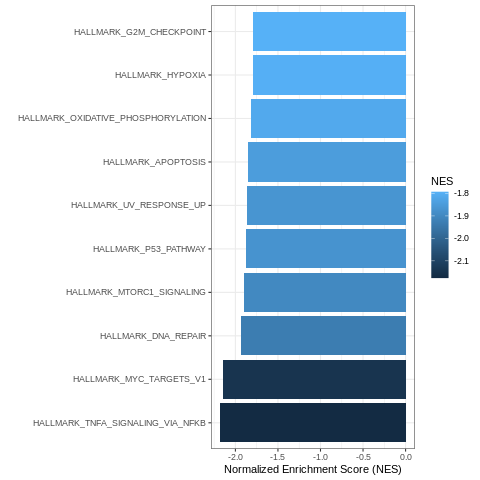

In [ ]:
%%R
top10 <- fgsea_res[1:10, ]

ggplot(top10, aes(x = reorder(pathway, NES), y = NES, fill = NES)) +
  geom_col() +
  coord_flip() +
  theme_bw() +
  labs(x = "", y = "Normalized Enrichment Score (NES)")


# Section 8: Lead Edge Heatmap

In [ ]:
%%R
install.packages("pheatmap", repos = "https://cran.r-project.org", type = "source")
library(pheatmap)


(as ‘lib’ is unspecified)







	‘/tmp/RtmpRL9xTE/downloaded_packages’



In [ ]:
%%R
vsd <- vst(dds)


In [ ]:
%%R
dim(assay(vsd))


[1] 38366     8


In [ ]:
%%R
top_path <- fgsea_res$pathway[1]
lead_genes <- unique(unlist(fgsea_res$leadingEdge[[1]]))

vsd_genes <- rownames(assay(vsd))

intersect_count <- length(intersect(lead_genes, vsd_genes))
list(
  top_path = top_path,
  n_leading_edge_genes = length(lead_genes),
  n_genes_in_vsd = length(vsd_genes),
  n_matching_genes = intersect_count,
  leading_edge_genes = head(lead_genes)
)


$top_path
[1] "HALLMARK_TNFA_SIGNALING_VIA_NFKB"

$n_leading_edge_genes
[1] 74

$n_genes_in_vsd
[1] 38366

$n_matching_genes
[1] 0

$leading_edge_genes
[1] "KDM6B" "ZFP36" "RELA"  "BTG1"  "FOSL2" "PDE4B"



In [ ]:
%%R
lead_syms <- fgsea_res$leadingEdge[[1]]
length(lead_syms)
head(lead_syms)


[1] "KDM6B" "ZFP36" "RELA"  "BTG1"  "FOSL2" "PDE4B"


In [ ]:
%%R
library(org.Hs.eg.db)
library(AnnotationDbi)

lead_syms <- c("KDM6B","ZFP36","RELA","BTG1","FOSL2","PDE4B")

map_back <- AnnotationDbi::select(
  org.Hs.eg.db,
  keys = lead_syms,
  keytype = "SYMBOL",
  columns = "ENSEMBL"
)

map_back


  SYMBOL         ENSEMBL
1  KDM6B ENSG00000132510
2  ZFP36 ENSG00000128016
3   RELA ENSG00000173039
4   BTG1 ENSG00000133639
5  FOSL2 ENSG00000075426
6  PDE4B ENSG00000184588


In [ ]:
%%R
vsd_ens <- sub("\\..*$", "", rownames(assay(vsd)))

lead_ens <- intersect(map_back$ENSEMBL, vsd_ens)

lead_ens
length(lead_ens)


[1] 6


Top FGSEA pathway: HALLMARK_TNFA_SIGNALING_VIA_NFKB 
Leading-edge genes (n): 74 


Leading-edge genes present in VSD: 74 


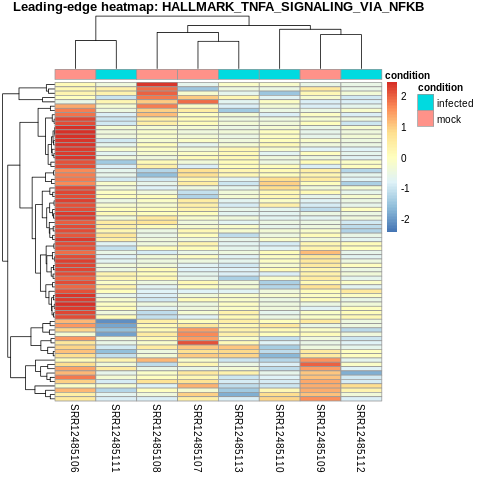

In [ ]:
%%R
library(pheatmap)
library(org.Hs.eg.db)
library(AnnotationDbi)

# 1. Make sure we have vsd and res
# (if you restarted the runtime, re-run the DESeq2 section before this)

# 2. Get top FGSEA pathway and its leading-edge SYMBOLS
top_path <- fgsea_res$pathway[1]
lead_syms <- unique(unlist(fgsea_res$leadingEdge[[1]]))

cat("Top FGSEA pathway:", top_path, "\n")
cat("Leading-edge genes (n):", length(lead_syms), "\n")

# 3. Map VSD rownames (Ensembl-ish) -> SYMBOL
vsd_mat <- assay(vsd)
ens_vsd  <- sub("\\..*$", "", rownames(vsd_mat))  # strip any versions

sym_map_vsd <- AnnotationDbi::select(
  org.Hs.eg.db,
  keys    = ens_vsd,
  keytype = "ENSEMBL",
  columns = "SYMBOL"
)

# Clean mapping
sym_map_vsd <- sym_map_vsd[!is.na(sym_map_vsd$SYMBOL), ]
sym_map_vsd <- sym_map_vsd[!duplicated(sym_map_vsd$ENSEMBL), ]

# Align vsd rows with mapping
idx <- match(sym_map_vsd$ENSEMBL, ens_vsd)
vsd_sym <- vsd_mat[idx, , drop = FALSE]
rownames(vsd_sym) <- sym_map_vsd$SYMBOL

# 4. Intersect leading-edge SYMBOLS with vsd SYMBOL rownames
lead_syms_present <- intersect(lead_syms, rownames(vsd_sym))
cat("Leading-edge genes present in VSD:", length(lead_syms_present), "\n")

use_leading_edge <- TRUE

if (length(lead_syms_present) < 2) {
  cat("WARNING: Too few leading-edge genes overlap with VSD. Falling back to top DE genes.\n")
  use_leading_edge <- FALSE
}

# 5. If no overlap, fall back to top 30 DE genes by |stat|
if (use_leading_edge) {
  sub_mat <- vsd_sym[lead_syms_present, , drop = FALSE]
  heatmap_title <- paste0("Leading-edge heatmap: ", top_path)
} else {
  res_df <- as.data.frame(res)
  res_df$ENSEMBL <- sub("\\..*$", "", rownames(res_df))

  # Map DESeq2 Ensembl -> SYMBOL, align with vsd_sym
  sym_map_res <- AnnotationDbi::select(
    org.Hs.eg.db,
    keys    = res_df$ENSEMBL,
    keytype = "ENSEMBL",
    columns = "SYMBOL"
  )
  sym_map_res <- sym_map_res[!is.na(sym_map_res$SYMBOL), ]
  sym_map_res <- sym_map_res[!duplicated(sym_map_res$ENSEMBL), ]

  res_merged <- merge(res_df, sym_map_res, by.x = "ENSEMBL", by.y = "ENSEMBL", all.x = TRUE)
  res_merged <- res_merged[!is.na(res_merged$SYMBOL), ]
  res_merged <- res_merged[!duplicated(res_merged$SYMBOL), ]

  # pick top 30 by |stat|
  res_merged <- res_merged[order(-abs(res_merged$stat)), ]
  top_syms   <- head(res_merged$SYMBOL, 30)

  top_syms_present <- intersect(top_syms, rownames(vsd_sym))

  cat("Top DE genes present in VSD (fallback):", length(top_syms_present), "\n")

  sub_mat <- vsd_sym[top_syms_present, , drop = FALSE]
  heatmap_title <- "Heatmap of top DE genes (fallback)"
}

# 6. Column annotation by condition
annotation <- data.frame(condition = coldata$condition)
rownames(annotation) <- rownames(coldata)

# 7. Plot heatmap
pheatmap(
  sub_mat,
  scale = "row",
  annotation_col = annotation,
  clustering_distance_cols = "correlation",
  clustering_distance_rows = "correlation",
  show_rownames = FALSE,
  fontsize_row = 6,
  main = heatmap_title
)
